### This will be the Bob Ross Code!!!

In [4]:
# imports
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as img
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

### KNN Bob Ross Gallery Creator

In [5]:
# read in the Bob Ross CSV

br = pd.read_csv('elements-by-episode.csv')
br.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


### Initial Data Analysis

In [6]:
# See which elements are the most common
element_counts = []
elements = []
for col in br.columns.values[2:]:
    elements.append(col)
    element_counts.append(sum(br[col]))

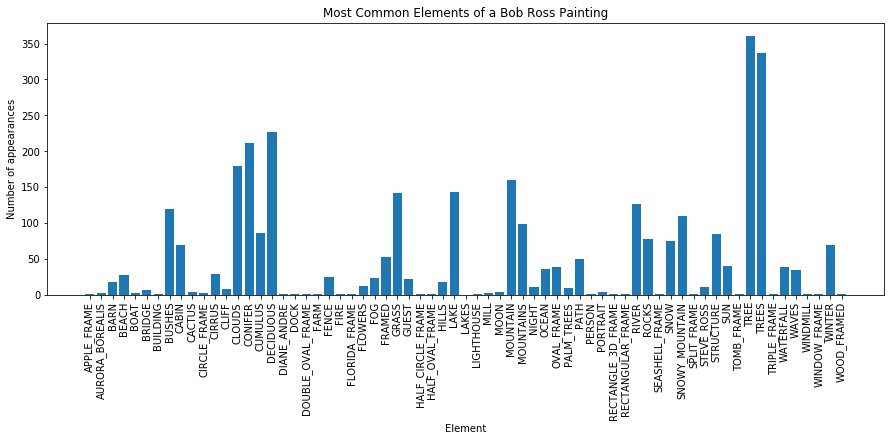

In [7]:
# Graph the most common items
fig = plt.figure(figsize=(15, 5))

y_pos = np.arange(len(br.columns.values[2:]))
ax = plt.subplot(111, xlabel='Element', ylabel='Number of appearances', title='Most Common Elements of a Bob Ross Painting')
plt.xticks(y_pos, elements, rotation=90)
ax.bar(y_pos, element_counts)

plt.show()

The 5 most common Bob Ross Painting elements are Trees (background), Tree (foreground), Deciduous, Conifer, and Clouds. Use these to make the quintessential Bob Ross painting.

In [8]:
# define a variable containing only the boolean data
data = br[br.columns.values[2:]]

In [60]:
def createGallery(name, n):
    name = name.upper()
    
    # Find the index of the desired painting
    i = 0
    index = 0
    for title in br['TITLE']:
        if name == title:
            index = i
        i += 1
        
    # Create the KNN Model

    # Use the Guest column as the target, since it isn't an element of the painting
    target = br['GUEST']
    data = br[br.columns.values[2:]]

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(data, target)
    
    # Find the k nearest neighbors
    test = br.iloc[index, :]
    neighbors = neigh.kneighbors(test[2:].values.reshape(1,-1), n_neighbors=n, return_distance=False)
    
    # Print out the names of the nearest neighbors along with the image it corresponds to
    for neighbor in neighbors:
        counter = 1;
        # Print the episode and title
        for i in neighbor:
            # store the episode and title
            et = br.iloc[i, 0:2]
            episode = et["EPISODE"]
            title = et["TITLE"]
            #store the image
            img_title = 'Images/' +title[1:-1].lower().translate(str.maketrans('','', string.punctuation)) + '.png'
            image_name = img_title.replace(' ', '')
            image = img.imread(image_name, 0)
            #show image
            fig = plt.figure(figsize = (10, n*5))
            ax = fig.add_subplot(n, 1, counter)
            ax.set_title(episode + ' ' + title)
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            ax.imshow(image)
            counter += 1

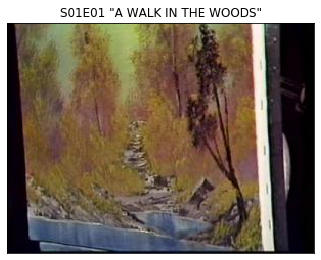

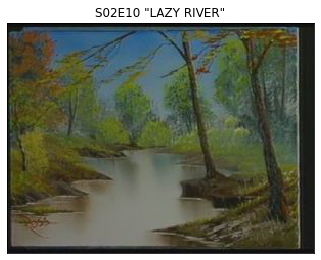

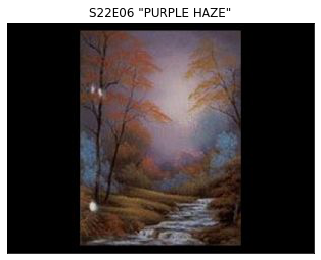

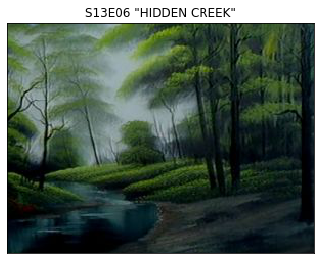

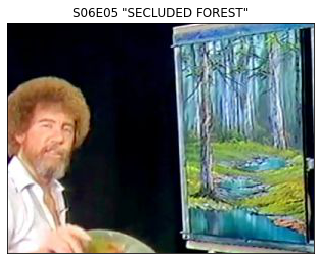

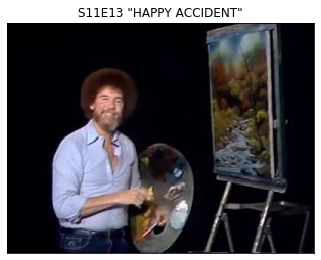

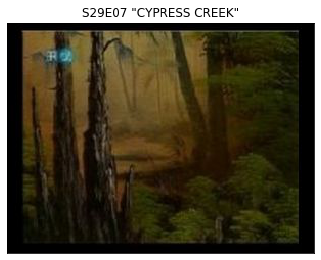

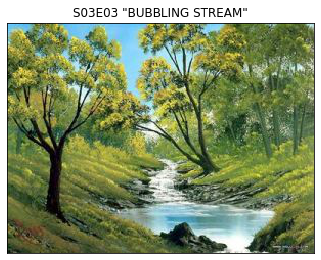

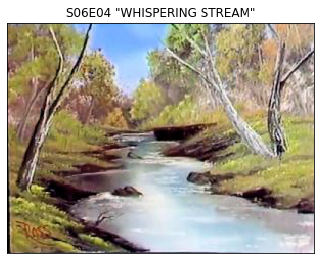

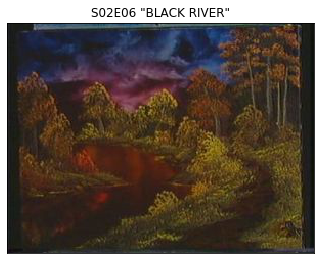

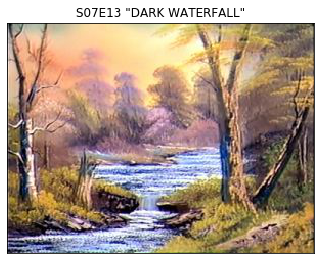

In [62]:
# Test CreateGallery
createGallery('EBONY SUNSET', 11)

### Clustering

In [12]:
print(br.columns.values)

['EPISODE' 'TITLE' 'APPLE_FRAME' 'AURORA_BOREALIS' 'BARN' 'BEACH' 'BOAT'
 'BRIDGE' 'BUILDING' 'BUSHES' 'CABIN' 'CACTUS' 'CIRCLE_FRAME' 'CIRRUS'
 'CLIFF' 'CLOUDS' 'CONIFER' 'CUMULUS' 'DECIDUOUS' 'DIANE_ANDRE' 'DOCK'
 'DOUBLE_OVAL_FRAME' 'FARM' 'FENCE' 'FIRE' 'FLORIDA_FRAME' 'FLOWERS' 'FOG'
 'FRAMED' 'GRASS' 'GUEST' 'HALF_CIRCLE_FRAME' 'HALF_OVAL_FRAME' 'HILLS'
 'LAKE' 'LAKES' 'LIGHTHOUSE' 'MILL' 'MOON' 'MOUNTAIN' 'MOUNTAINS' 'NIGHT'
 'OCEAN' 'OVAL_FRAME' 'PALM_TREES' 'PATH' 'PERSON' 'PORTRAIT'
 'RECTANGLE_3D_FRAME' 'RECTANGULAR_FRAME' 'RIVER' 'ROCKS' 'SEASHELL_FRAME'
 'SNOW' 'SNOWY_MOUNTAIN' 'SPLIT_FRAME' 'STEVE_ROSS' 'STRUCTURE' 'SUN'
 'TOMB_FRAME' 'TREE' 'TREES' 'TRIPLE_FRAME' 'WATERFALL' 'WAVES' 'WINDMILL'
 'WINDOW_FRAME' 'WINTER' 'WOOD_FRAMED']


In [22]:
# Create hierarchical clusters to sort the paintings

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 

array([2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1,
       2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2,
       0, 2,

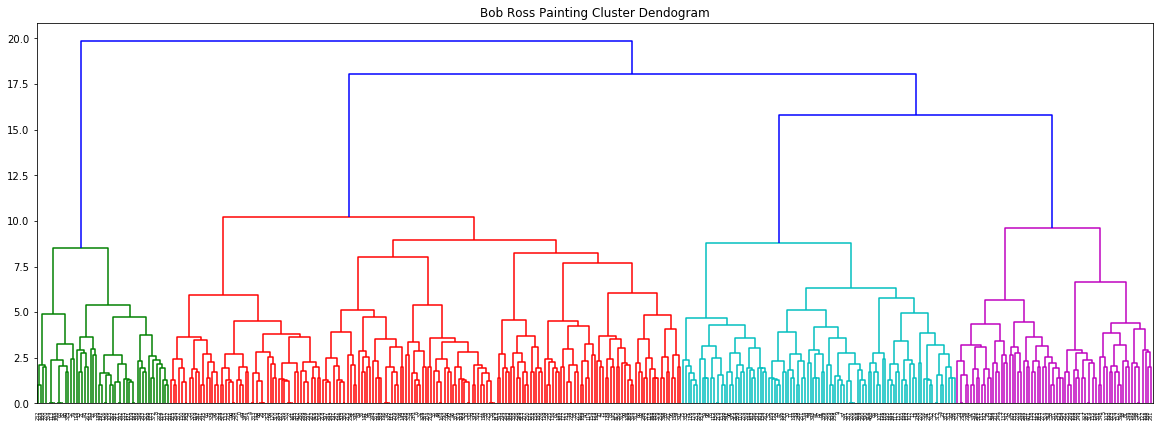

In [29]:
# Show the dedrogram that displays cluster choices (small version)
# https://www.displayr.com/what-is-dendrogram/
plt.figure(figsize=(20, 7))  
plt.title("Bob Ross Painting Cluster Dendogram")
plt.xticks(np.arange(len(br['TITLE'])), br['TITLE'])
dend = shc.dendrogram(shc.linkage(data, method='ward'))

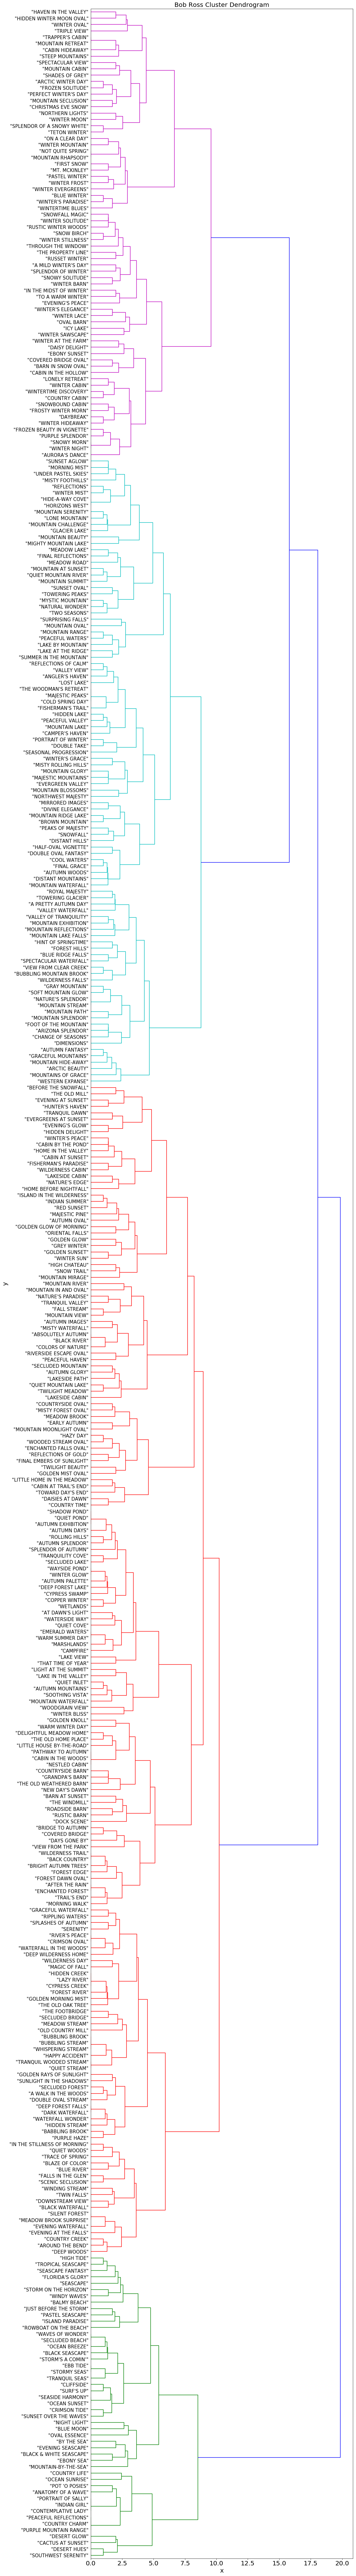

In [30]:
# Show the dedrogram that displays cluster choices (large version)
fig = plt.figure(figsize=(15, 150))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='Bob Ross Cluster Dendrogram')
plt.yticks(np.arange(len(br['TITLE'])), br['TITLE'])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + 
            ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
dend = shc.dendrogram(shc.linkage(data, method='ward'), orientation='right', leaf_font_size=15, labels=list(br['TITLE']))  